In [8]:
import math, copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import cv2

In [32]:
import cv2

class Transformations():
    '''A class for transforming images to assist in data augmentation. Performs tasks like
    
    done - Rotate 
    - Shear
    - Translations
    done - Colour transformations
    - Resizing
    done - Cropping 
    done  - Adding noise 
    done - Removing noise 
    
    '''
    
    def color_transformation(self, image_arr, kind = 'default'):
        '''Function for transforming a RGB image to some other space specified by the 'kind' argument.
        
        Arguments: 
        
        1. image_arr: the input image (as a numpy array)
        2. kind : the transformation to be applied
        
        TODO: add types here
        
        Returns: The modified image (as a numpy array)
        
        **NOTE : HSV seems interesting**
        
        Consult here for transformations: https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html'''

        
        if kind == 'default':
            return image_arr

        elif kind == 'gray':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2GRAY)

        elif kind == 'bgr':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2BGR)
        
        elif kind == 'xyz':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2XYZ)
        
        elif kind == 'YCrCb':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2YCrCb)

        elif kind == 'HSV':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2HSV)

        elif kind == 'Lab':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2Lab)

        elif kind == 'Luv':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2Luv)

        elif kind == 'HLS':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2HLS)

        elif kind == 'YUV':
            return cv2.cvtColor(image_arr, cv2.COLOR_RGB2YUV)

        else:
            # default, do nothing
            return image_arr

    def rotate_transformation(self ,image_arr):
        '''Function for rotating an image by some random angle. and then cropping the image to remove black borders.
        
        Arguments: 
        
        1. image_arr: the input image (as a numpy array)
        
        Returns: The modified image (as a numpy array) '''
        num_rows, num_cols = image_arr.shape[:2]
        rotated_image = cv2.warpAffine(image_arr, cv2.getRotationMatrix2D((num_cols/2, num_rows/2), random.randint(0, 360), 0.6), (num_cols, num_rows))


    def crop_image(self, image_arr ,tolerance=0):
        '''Function for cropping an image by boundaries only.
        image is 2D or 3D image data
        Arguments: 
        
        1. image_arr: the input image (as a numpy array)
        2. tolerance: the tolerance for cropping
        
        Returns: The modified image (as a numpy array) '''
        mask = image_arr>tolerance
        if image_arr.ndim==3:
            mask = mask.all(2)
        m,n = mask.shape
        mask0,mask1 = mask.any(0),mask.any(1)
        col_start,col_end = mask0.argmax(),n-mask0[::-1].argmax()
        row_start,row_end = mask1.argmax(),m-mask1[::-1].argmax()
        return image_arr[row_start:row_end,col_start:col_end]

    def adding_noise(self, image_arr , kind):
        if kind == 'default':
            return image_arr

        elif kind == 'gaussian':
            num_rows, num_cols = image_arr.shape[:2]
            gauss_noise=np.zeros((num_rows,num_cols),dtype=np.uint8)
            cv2.randn(gauss_noise,128,20)
            gauss_noise=(gauss_noise*0.5).astype(np.uint8)
            gn_img=cv2.add(image_arr,gauss_noise)
            return gn_img

        elif kind == 'uniform':
            num_rows, num_cols = image_arr.shape[:2]
            uni_noise=np.zeros((num_rows,num_cols),dtype=np.uint8)
            cv2.randu(uni_noise,0,255)
            uni_noise=(uni_noise*0.5).astype(np.uint8)
            un_img=cv2.add(image_arr,uni_noise)
            return un_img
        
        elif kind == 'impulse':
            num_rows, num_cols = image_arr.shape[:2]
            imp_noise=np.zeros((num_rows,num_cols),dtype=np.uint8)
            cv2.randu(imp_noise,0,255)
            imp_noise=cv2.threshold(imp_noise,245,255,cv2.THRESH_BINARY)[1]
            in_img=cv2.add(image_arr,imp_noise)
            return in_img

        else:
            # default, do nothing
            return image_arr

    def removing_noise(self, image_arr , kind):
        if kind == 'default':
            return image_arr

        elif kind == 'gaussian':
            return cv2.GaussianBlur(image_arr,(3,3),0)

        elif kind == 'median':
            return cv2.medianBlur(image_arr,3)

        elif kind == 'bilateral':
            return cv2.bilateralFilter(image_arr,9,75,75)

        else:
            # default, do nothing
            return image_arr

    
        
        
         

    

SyntaxError: invalid syntax (2416976517.py, line 28)

Text(0.5, 1.0, 'Unparasitized, grayscale')

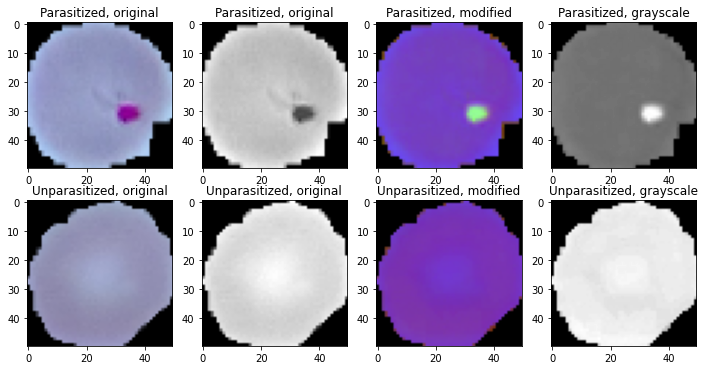

In [70]:
color_lst = ['default', 'gray', 'bgr', 'xyz', 'YCrCb', 'HSV', 'Lab', 'Luv', 'HLS', 'YUV', 'ur mum']

image_p = cv2.imread('parasitized1.png', -1)
image_up = cv2.imread('uninfected1.png', -1)

transform = cv2.COLOR_RGB2HSV


rgb_image_p = cv2.cvtColor(image_p, transform)
rgb_image_up = cv2.cvtColor(image_up, transform)

fig, axes = plt.subplots(2, 4, figsize = (12, 6))
axes[0][0].imshow(image_p)
axes[0][0].set_title('Parasitized, original')
axes[0][1].imshow(cv2.cvtColor(image_p, cv2.COLOR_RGB2GRAY), cmap = 'gray')
axes[0][1].set_title('Parasitized, original')
axes[0][2].imshow(rgb_image_p)
axes[0][2].set_title('Parasitized, modified')
axes[0][3].imshow(cv2.cvtColor(rgb_image_p, cv2.COLOR_RGB2GRAY), cmap = 'gray')
axes[0][3].set_title("Parasitized, grayscale")

axes[1][0].imshow(image_up)
axes[1][0].set_title("Unparasitized, original")
axes[1][1].imshow(cv2.cvtColor(image_up, cv2.COLOR_RGB2GRAY), cmap = 'gray')
axes[1][1].set_title('Unparasitized, original')
axes[1][2].imshow(rgb_image_up)
axes[1][2].set_title("Unparasitized, modified")
axes[1][3].imshow(cv2.cvtColor(rgb_image_up, cv2.COLOR_RGB2GRAY), cmap = 'gray')
axes[1][3].set_title("Unparasitized, grayscale")